In [1]:
import pandas as pd 
import numpy as np 
import pprint as pp
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# Algunas configuraciones de los paquetes
sns.set(color_codes=True)

In [2]:
#Ofertas de trabajo en remoto
ofertas=pd.read_csv(r"C:\Users\reito\Documents\GitHub\77_Miss_Cosas\2.Analytics\EDA\remote_jobs_in Spain(2020)\jobs.csv")
ofertas.iloc[0:5,:]

,title,city,province,price_start,price_end,price_interval,price_currency,description,date,expertise,type,functions,sectors,portal
0,support,Sant Cugat del Vallès,Barcelona,NaN,NaN,NaN,euro,date posted sep 4 2020 location sant cugat ...,2020-10-23,NaN,NaN,NaN,NaN,indeed
1,qa tester,Sant Cugat del Vallès,Barcelona,NaN,NaN,NaN,euro,date posted oct 22 2020 location sant cugat...,2020-10-23,NaN,NaN,NaN,NaN,indeed
2,mathematics consultant,Sant Cugat del Vallès,Barcelona,NaN,NaN,NaN,euro,date posted oct 22 2020 location sant cugat...,2020-10-23,NaN,NaN,NaN,NaN,indeed
3,€1500 mes ventas internet,Tarragona,Tarragona,1500.0,NaN,monthly,euro,buscamos personas trabajar ventas dedicando 3...,2020-10-23,NaN,NaN,NaN,NaN,indeed
4,jovenes €1500 ventas internet,Tarragona,Tarragona,1500.0,NaN,monthly,euro,buscamos personas trabajar ventas dedicando 3...,2020-10-23,NaN,NaN,NaN,NaN,indeed


In [3]:
#Ranking de las localizaciones desde las que se lanzan más ofertas de empleo
#Este dato es importante para:
#     **1 Estar más pendientes de las ofertas que se lanzen allí porque es donde voy a encontrar más ofertas en remoto
#     **2 Ser conocedores de donde se encuentran las Centrale de las oficinas en caso de que haga falta desplazarse ahí de manera periódica
#NOTA 1--> Hay 2 localizaciones que a priori son neutras y no requieren de estas consideraciones de desplazamiento y son 'España' y 'En remoto'
#NOTA 2 -->Obtén gráfica de los resultados obtenidos 
prov_deman=ofertas.copy()
loc_headq=prov_deman.province.value_counts().head(9)
print(loc_headq)

province
Madrid       816
Barcelona    458
España       140
En remoto    118
Málaga        47
Sevilla       32
Valencia      28
Zaragoza      21
Granada       20
Name: count, dtype: int64


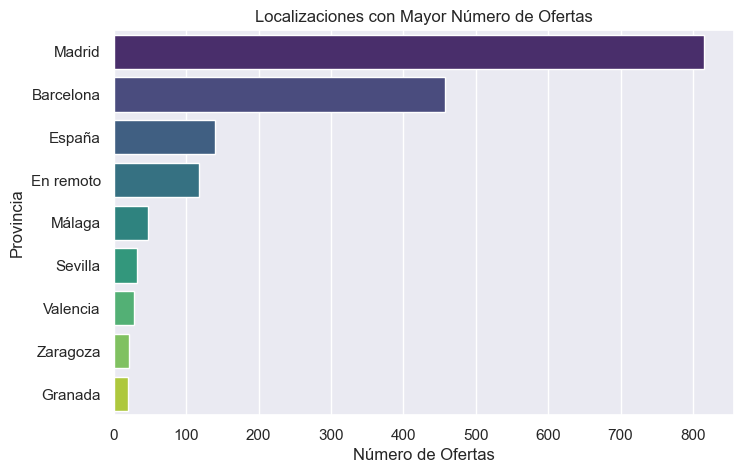

In [4]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 5))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x=loc_headq.values, y=loc_headq.index, palette="viridis",hue=loc_headq.index)
plt.xlabel("Número de Ofertas")
plt.ylabel("Provincia")
plt.title("Localizaciones con Mayor Número de Ofertas")
plt.show()

In [5]:
print('======================'*5)
print("La FORMA que tiene el DATASET es de:",ofertas.shape) #Forma del dataset
print("El numero de FILAS que tienes es", ofertas.shape[0])  # o con print("El numero de filas que tienes es", ofertas.city.size)
print("El numero de COLUMNAS que tienes es", ofertas.shape[1]) #tot_pobl_fil=len(ofertas) tambien cuenta las filas del df
print("Los indices de COLUMNAS del DATASET son:",ofertas.index)  #Así se muestran los valores de indices de fila,  si no fuesen numericos te muestra el array
print('======================'*5)

print("\nEl NOMBRE DE LAS COLUMNAS son lo siguientes:\n\n",ofertas.columns) #Así se muestran los valores de indices de columna

La FORMA que tiene el DATASET es de: (1987, 14)
El numero de FILAS que tienes es 1987
El numero de COLUMNAS que tienes es 14
Los indices de COLUMNAS del DATASET son: RangeIndex(start=0, stop=1987, step=1)

El NOMBRE DE LAS COLUMNAS son lo siguientes:

 Index(['title', 'city', 'province', 'price_start', 'price_end',
       'price_interval', 'price_currency', 'description', 'date', 'expertise',
       'type', 'functions', 'sectors', 'portal'],
      dtype='object')


In [6]:
ofertas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1987 non-null   object 
 1   city            907 non-null    object 
 2   province        1984 non-null   object 
 3   price_start     225 non-null    float64
 4   price_end       118 non-null    float64
 5   price_interval  225 non-null    object 
 6   price_currency  1987 non-null   object 
 7   description     1985 non-null   object 
 8   date            1987 non-null   object 
 9   expertise       949 non-null    object 
 10  type            949 non-null    object 
 11  functions       943 non-null    object 
 12  sectors         933 non-null    object 
 13  portal          1987 non-null   object 
dtypes: float64(2), object(12)
memory usage: 217.5+ KB


                %_Datos_Informados
title                        100.0
price_currency               100.0
date                         100.0
portal                       100.0
description                   99.9
province                      99.8
expertise                     47.8
type                          47.8
functions                     47.5
sectors                       47.0
city                          45.6
price_start                   11.3
price_interval                11.3
price_end                      5.9 




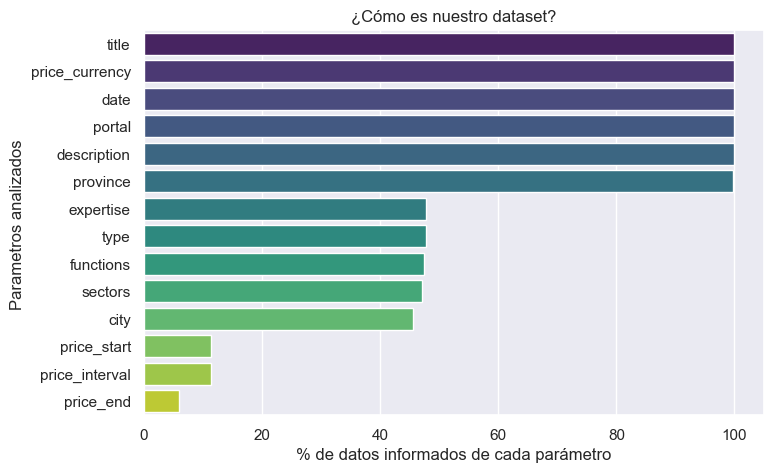

In [7]:
# Que % de DATOS informados en estas columnas CONTIENEN INFORMACION (SON DISTINTOS de 0, vacío o NaN)?
# [Esto lo hago para saber si voy a tener suficientes datos como para sacar conclusiones interesantes]

list=[]
for i in ofertas.columns:
    list.append(round((1-np.sum(ofertas[i].isnull())/len(ofertas))*100,1))

#pp.pprint(list) Esta es la cantidad de datos con informacion en esta columna
    
col_masutiles=pd.DataFrame(data=list,index=ofertas.columns) #df columna desordenado y nombre col automático
col_masutiles=col_masutiles.rename(columns={0:'%_Datos_Informados'})   #Renombramos columna 
col_masutiles=col_masutiles.sort_values(by='%_Datos_Informados',axis=0,ascending=False )  #Ordenamos columna 
print(col_masutiles,'\n\n')

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 5))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x=col_masutiles['%_Datos_Informados'], y=col_masutiles.index, palette="viridis",hue=col_masutiles.index)

plt.xlabel("% de datos informados de cada parámetro")
plt.ylabel("Parametros analizados ")
plt.title("¿Cómo es nuestro dataset?")
plt.show()


| Cabecero        | Descripción                                         |
|-----------------|-----------------------------------------------------|
| title           | Título o nombre del puesto de trabajo anunciado     |
| city            | Ciudad donde se encuentra la ubicación del trabajo  |
| province        | Provincia o región geográfica de la ubicación          |
| price_start     | Salario mínimo anunciado (en euros)                    |
| price_end       | Salario máximo anunciado (en euros)                    |
| price_interval  | Frecuencia de pago (diario/semanal/mensual)            |
| price_currency  | Moneda en la que se expresa el salario                 |
| description     | Descripción detallada del trabajo y requisitos         |
| date            | Fecha de publicación del anuncio de trabajo            |
| expertise       | Nivel de experiencia requerido(txt libre no preciso)   |
| type            | Tipo de trabajo (txt libre no preciso)                 |
| functions       | Funciones o responsabilidades (txt libre no preciso)   |
| sectors         | Sectores o industrias relacionados(txt libre no preciso)|
| portal          | Portal o plataforma donde se publicó el anuncio    |


####  Estas son las COLUMNAS QUE CONSIDERO MÁS ÚTILES, apuesto por las columnas que tienen más de un 80% de resultados confiando en el principio de Pareto (80-20).

Si tienes el 80% de un conjunto de datos informado, según el principio de Pareto o la regla del 80/20, podrías concluir lo siguiente:

1. **Concentración de Información:** El 80% de la información o resultados proviene de una parte relativamente pequeña del conjunto de datos. Esto significa que una minoría de los datos o factores tiene un impacto significativo en los resultados o en tu comprensión de la situación.

2. **Importancia de la Identificación:** Identificar y comprender bien esta parte clave del conjunto de datos es esencial, ya que probablemente contenga la mayoría de la información crítica o los patrones relevantes.

3. **Posible Simplificación:** Puedes simplificar tu análisis o enfoque al centrarte principalmente en esta parte importante del conjunto de datos. Esto puede ayudarte a tomar decisiones más efectivas y ahorra tiempo y recursos al evitar un análisis exhaustivo de todos los datos.

4. **Enfoque en la Mejora:** Si estás trabajando en la mejora de un proceso o la toma de decisiones, enfócate en los factores o variables que forman parte de ese 80% inicial. Mejorar o optimizar estos factores puede tener un impacto significativo en los resultados globales.

### ÉSTAS SON LAS COLUMNAS MÁS ÚTILES
 De estas columnas selecciono como fundamentales:
   **'Title'**-->Porque nos dice el tipo de trabajo que se oferta
   **'Date'**--> Porque nos dice el espacio de tiempo en el que se hizo el extracto de fechas 
   **'Province'**-->Para hacernos a la idea de la localización de las empresas más abiertas al trabajo en remoto

#### Nota --> Deshecho 'description' porque cada uno de los anunciantes clasifica los puestos sin un criterio estandar y por lo tanto no nos podemos fiar de lo que dicen. Con 'Title' pasa algo parecido pero creo que es conveniente dejar algun identificativo

***Como informacion sesgada y para orientarnos un poco con los datos que tenemos sobre los sueldos min-max-medio (mensual/anual)*** 
***extraeremos los datos de la columna 'price_star', 'prince_end' y  'price interval'-->Salario de los nómadas digitales*** 

In [8]:
round(col_masutiles[col_masutiles['%_Datos_Informados']>0.8],2)

,%_Datos_Informados
title,100.0
price_currency,100.0
date,100.0
portal,100.0
description,99.9
province,99.8
expertise,47.8
type,47.8
functions,47.5
sectors,47.0


**<style>
p {
    line-height: 1; /* Esto establece el interlineado al mínimo (sin espacio entre líneas) */
}
</style>**
*<p>Para orientarnos un poco a nivel de retribuciones salariales ofertadas, ya que sólo un 10% de los datos estan documentados en este aspecto,extraeremos los datos de la columna  **<p>'price_star' , 'prince_end'  y 'price interval'<p>**-->Salario de los nómadas digitales DE ESTA MANERA CALCULAMOS LOS SALARIOS QUE HAY PARA TRABAJOS EN REMOTO</p>*

In [9]:
inter_base=ofertas[['price_start','price_end','price_interval']] 
inter_sal=inter_base.copy()

In [10]:
#La columna 'price start' de la tabla "inter_sal" muestra la retribucion salarial del puesto de trabajo por año/mes/semana/hora
#-->ESTIMACION CON LOS SALARIOS MÁS BAJOS (MENOS OPTIMISTA--> Ej. salario inicial anual)
sal_ini_anu=inter_sal['price_start'][inter_sal['price_interval']=='yearly']
sal_ini_men=inter_sal['price_start'][inter_sal['price_interval']=='monthly']
sal_ini_sem=inter_sal['price_start'][inter_sal['price_interval']=='weekly']
sal_ini_hora=inter_sal['price_start'][inter_sal['price_interval']=='hourly']

In [11]:
#La columna 'price end' de la tabla "inter_sal" muestra la retribucion salarial del puesto de trabajo por año/mes/semana/hora
#-->ESTIMACION CON LOS SALARIOS MÁS ALTOS ESPERADOS (OPTIMISTA-->Ej. salario inicial anual optimista)
#La tabla tarifica los salarios en base a precio por año/mes/semana/hora-->ESTIMACION CON LOS SALARIOS MÁS ALTOS(OPTIMISTA)
sal_ini_anu_op=inter_sal['price_end'][inter_sal['price_interval']=='yearly']
sal_ini_men_op=inter_sal['price_end'][inter_sal['price_interval']=='monthly']
sal_ini_sem_op=inter_sal['price_end'][inter_sal['price_interval']=='weekly']
sal_ini_hora_op=inter_sal['price_end'][inter_sal['price_interval']=='hourly']

#NOTA(1): 
#Todos estos valores: 'sal_ini_anu_op','sal_ini_men_op','sal_ini_sem_op','sal_ini_hora_op' nos dan números pero cada uno de distinta magnitud
#lo cual no nos permite hacer un analisis descriptivo de la muestra
#NO es lo mismo la escala de retribucion anual con cifras mayores a 10k€,que la mensual, con cifras en torno a los 1000-2000€, o las diarias.
#Por lo que tendremos que unificar de alguna manera los datos obtenidos
#NOTA(2):
#Idem para los daros menos optimistas 

#### Lo que se hace a continuación es extrapolar todos los datos a nivel salario bruto anual SUPONIENDO:
#### Jornadas laborales de 8 horas y 225 díasde trabajo al año tal y conforme se tenían en 2020 (pendiente de revisión por el gobierno en 2024).

***info***: Factorial

https://factorialhr.es/blog/calcular-jornada-laboral/#:~:text=Otro%20elemento%20a%20tener%20en,quedamos%20con%20243%20días%20laborales.

***info***: elEconomista

https://www.eleconomista.es/empleo/noticias/12506361/10/23/cuantas-horas-anuales-son-375-horas-semanales.html

***info***: statista

https://es.statista.com/estadisticas/478441/promedio-de-horas-de-trabajo-al-ano-segun-convenios-colectivos-de-espana/

In [12]:
#Correccion anual-->VISION DE SALARIOS MENOS OPTIMISTA 
sal_ini_anu=      inter_sal['price_start'][inter_sal['price_interval']=='yearly']
sal_ini_men_corr=  (inter_sal['price_start'][inter_sal['price_interval']=='monthly'])*12   #Correccion de mensual a anual
sal_ini_sem_corr=  (inter_sal['price_start'][inter_sal['price_interval']=='weekly'])*52    #Correccion de semanal a anual
sal_ini_hora_corr= (inter_sal['price_start'][inter_sal['price_interval']=='hourly'])*1736  #Correccion de horaria a anual
sal_tot=pd.concat([sal_ini_anu,sal_ini_men_corr,sal_ini_sem_corr,sal_ini_hora_corr])       #Unión de todos los segmentos de tabla corregidos
round(sal_tot.describe(),2)


count       225.00
mean      25482.76
std       21613.69
min        3000.00
25%       12000.00
50%       18000.00
75%       30000.00
max      121500.00
Name: price_start, dtype: float64

In [13]:
#Correccion anual-->VISION DE SALARIOS OPTIMISTA 
sal_ini_anu_op=      inter_sal['price_end'][inter_sal['price_interval']=='yearly']
sal_ini_men_corr_op=  (inter_sal['price_end'][inter_sal['price_interval']=='monthly'])*12   #Correccion de mensual a anual
sal_ini_sem_corr_op=  (inter_sal['price_end'][inter_sal['price_interval']=='weekly'])*52    #Correccion de semanal a anual
sal_ini_hora_corr_op= (inter_sal['price_end'][inter_sal['price_interval']=='hourly'])*1736  #Correccion de horaria a anual
sal_tot_op=pd.concat([sal_ini_anu_op,sal_ini_men_corr_op,sal_ini_sem_corr_op,sal_ini_hora_corr_op]) #Union de todos los segmentos de tabla corregidos
round(sal_tot_op.describe(),2)

count       118.00
mean      38692.85
std       20254.56
min        5000.00
25%       24000.00
50%       37500.00
75%       50000.00
max      104160.00
Name: price_end, dtype: float64

In [14]:
print("CON PERSPECTIVAS LABORALES OPTIMISTAS(BRUTO ANUAL)=============================================================== ")
print("El salario inicial que se suele pagar habitualmente es de",sal_tot_op.describe()['50%'],"€ Anuales")
print("Los salarios más bajos acostumbran a estar en torno a los",sal_tot_op.describe()['25%'],"€ Anuales")
print("Los salarios más altos acostumbran a estar en torno a los",sal_tot_op.describe()['75%'],"€ Anuales")
print("De manera excepcional encontramos salarios donde inicialmente se ganan",sal_tot_op.describe()['max'],"€ Anuales")
print("================================================================================================================= ")

CON PERSPECTIVAS LABORALES OPTIMISTAS(BRUTO ANUAL)=============================================================== 
El salario inicial que se suele pagar habitualmente es de 37500.0 € Anuales
Los salarios más bajos acostumbran a estar en torno a los 24000.0 € Anuales
Los salarios más altos acostumbran a estar en torno a los 50000.0 € Anuales
De manera excepcional encontramos salarios donde inicialmente se ganan 104160.0 € Anuales


In [15]:
print("CON PERSPECTIVAS LABORALES POCO OPTIMISTAS(BRUTO ANUAL)========================================================== ")
print("El salario inicial que se suele pagar habitualmente es de",sal_tot.describe()['50%'],"€ Anuales")
print("Los salarios más bajos acostumbran a estar en torno a los",sal_tot.describe()['25%'],"€ Anuales")
print("Los salarios más altos acostumbran a estar en torno a los",sal_tot.describe()['75%'],"€ Anuales")
print("De manera excepcional encontramos salarios donde inicialmente se ganan",sal_tot.describe()['max'],"€ Anuales")
print("================================================================================================================= ")

CON PERSPECTIVAS LABORALES POCO OPTIMISTAS(BRUTO ANUAL)========================================================== 
El salario inicial que se suele pagar habitualmente es de 18000.0 € Anuales
Los salarios más bajos acostumbran a estar en torno a los 12000.0 € Anuales
Los salarios más altos acostumbran a estar en torno a los 30000.0 € Anuales
De manera excepcional encontramos salarios donde inicialmente se ganan 121500.0 € Anuales



#####  Lo siguiente es conocer la RETRIBUCION NETA MENSUAL a la que se aspira con un trabajo en remoto SI QUIERO SER UN NÓMADA DIGITAL que efectua su trabajo en el AMBITO GEOGRAFICO de ESPAÑA

A continuación, se detallan los tramos del IRPF para 2020:

Con ingresos hasta 12.450 €, la retención será del 19 %
Desde 12.450 € hasta 20.200 €, se retendrá el 24 %
Entre 20.200 € y 35.200 €, será el 30 %
De 35.200 € a 60.000 €, el 37 %
Sobre los 60.000 €, la retención será del 45 %

Fuente: Instituto de  Estudios Cajasol
https://institutocajasol.com/tramos-irpf-espana/

In [16]:
irpf=[0.81, 0.76, 0.7, 0.63, 0.55]
print("SALARIO NETO MENSUAL CON UNA PERSPECTIVA POCO OPTIMISTA (14 PAGAS) =============================================== ")
print("\t-El salario inicial que se suele pagar habitualmente es de",round((sal_tot.describe()['50%']*irpf[1])/14,2),"€ al mes")
print("\t-Los salarios más bajos acostumbran a estar en torno a los",round((sal_tot.describe()['25%']*irpf[0])/14,2),"€ al mes")
print("\t-Los salarios más altos acostumbran a estar en torno a los",round((sal_tot.describe()['75%']*irpf[2])/14,2),"€ al mes")
print("\t-De manera excepcional encontramos salarios donde inicialmente se ganan",round((sal_tot.describe()['max']*irpf[4])/14,2),"€ al mes")
print("================================================================================================================== ")

SALARIO NETO MENSUAL CON UNA PERSPECTIVA POCO OPTIMISTA (14 PAGAS) =============================================== 
	-El salario inicial que se suele pagar habitualmente es de 977.14 € al mes
	-Los salarios más bajos acostumbran a estar en torno a los 694.29 € al mes
	-Los salarios más altos acostumbran a estar en torno a los 1500.0 € al mes
	-De manera excepcional encontramos salarios donde inicialmente se ganan 4773.21 € al mes


In [17]:
irpf=[0.81, 0.76, 0.7, 0.63, 0.55]
print("SALARIO NETO MENSUAL CON UNA PERSPECTIVA OPTIMISTA (14 PAGAS) ==================================================== ")
print("\t-El salario inicial que se suele pagar habitualmente es de",round((sal_tot_op.describe()['50%']*irpf[1])/14,2),"€ al mes")
print("\t-Los salarios más bajos acostumbran a estar en torno a los",round((sal_tot_op.describe()['25%']*irpf[0])/14,2),"€ al mes")
print("\t-Los salarios más altos acostumbran a estar en torno a los",round((sal_tot_op.describe()['75%']*irpf[2])/14,2),"€ al mes")
print("\t-De manera excepcional encontramos salarios donde inicialmente se ganan",round((sal_tot.describe()['max']*irpf[4])/14,2),"€ al mes")
print("================================================================================================================== ")

SALARIO NETO MENSUAL CON UNA PERSPECTIVA OPTIMISTA (14 PAGAS) ==================================================== 
	-El salario inicial que se suele pagar habitualmente es de 2035.71 € al mes
	-Los salarios más bajos acostumbran a estar en torno a los 1388.57 € al mes
	-Los salarios más altos acostumbran a estar en torno a los 2500.0 € al mes
	-De manera excepcional encontramos salarios donde inicialmente se ganan 4773.21 € al mes


### Aqui ya hemos visto como esta el tema de las ofertas laborales y lo que se paga si quieres trabajar en remoto y ser un nómada digital, ahora veremos si con el dinero que ganamos nos da para vivir. Para ello nos centramos principalmente en el principal escollo que suele ser el precio del alquiler de la vivienda

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# Algunas configuraciones de los paquetes
sns.set(color_codes=True)

In [19]:
#Alojamientos turísticos
alojamientos=pd.read_csv(r"C:\Users\reito\Documents\GitHub\77_Miss_Cosas\2.Analytics\EDA\alojamientos-turisticos-sample(ene2017)\alojamientos-turisticos-sample.csv",sep=",")
aloha=alojamientos.copy()
alojamientos.iloc[0:2,:]

,apartment_id,url,name,description,host_id,neighborhood_overview,neighbourhood_name,neighbourhood_district,latitude,longitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,is_instant_bookable,reviews_per_month,country,city,insert_date
0,26316169,https://www.airbnb.com/rooms/26316169,Olivia's Place,Olivia`s place es Piso reformado a nuevo pensa...,123008256,"Barrio tranquilo, hay un chino al lado que ven...",Este,NaN,36.72462,-4.35947,...,10.0,10.0,8.0,9.0,Exempt,True,0.55,spain,malaga,2020-02-29
1,34672572,https://www.airbnb.com/rooms/34672572,1Bedroom apartment in Atocha - Wanda Metropoli...,Acogedor apartamento de 1 dormitorio y 1 baño ...,3256859,Este acogedor y amplio apartamento de dos dorm...,Cortes,Centro,40.41185,-3.69767,...,NaN,NaN,NaN,NaN,NaN,True,NaN,spain,madrid,2019-10-16


In [20]:
print('=====================================================================================================================')
print('ALOJAMIENTO TURÍSTICOS')
print("La forma que tiene el set de alojamiento turísticos es de :",aloha.shape) #Forma del dataset
print("El numero de filas que tienes es", aloha.shape[0])  # 
print("El numero de columnas que tienes es", aloha.shape[1]) #tot_pobl_fil=len(alojamientos) tambien cuenta las filas del df
print('=====================================================================================================================\n')
print("Los INDICES de FILA son:",aloha.index)  #Así se muestran los valores de indices de fila,  si no fuesen numericos te muestra el array
print("\nEl nombre del INDICES de las COLUMNAS son lo siguientes:\n\n",aloha.columns) #Así se muestran los valores de indices de columna

ALOJAMIENTO TURÍSTICOS
La forma que tiene el set de alojamiento turísticos es de : (10000, 40)
El numero de filas que tienes es 10000
El numero de columnas que tienes es 40

Los INDICES de FILA son: RangeIndex(start=0, stop=10000, step=1)

El nombre del INDICES de las COLUMNAS son lo siguientes:

 Index(['apartment_id', 'url', 'name', 'description', 'host_id',
       'neighborhood_overview', 'neighbourhood_name', 'neighbourhood_district',
       'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities_list', 'price', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'first_review_date', 'last_review_date',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', '

### Hay mucha informacion que no útil. La elimino para que no estorbe

In [21]:
shelter=aloha.drop(columns=['apartment_id', 'url', 'name', 'description', 'host_id',
       'neighborhood_overview', 'neighbourhood_name', 'neighbourhood_district',
       'latitude', 'longitude', 'room_type', 'bathrooms',
       'bedrooms', 'beds', 'amenities_list','has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'first_review_date', 'last_review_date',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication',
        'license', 'is_instant_bookable','reviews_per_month'])
shelter.head()

,accommodates,price,minimum_nights,maximum_nights,review_scores_location,review_scores_value,country,city,insert_date
0,5,80.0,2,30,8.0,9.0,spain,malaga,2020-02-29
1,4,500.0,1,1125,NaN,NaN,spain,madrid,2019-10-16
2,2,60.0,2,15,9.0,9.0,spain,mallorca,2020-04-23
3,2,48.0,1,12,9.0,9.0,spain,barcelona,2018-10-10
4,3,99.0,6,31,NaN,NaN,spain,girona,2019-08-31


In [22]:
shelter.describe()

,accommodates,price,minimum_nights,maximum_nights,review_scores_location,review_scores_value
count,10000.000000,10000.000000,10000.000000,1.000000e+04,7208.000000,7208.000000
mean,4.256400,129.477599,5.066800,2.155342e+05,9.522475,9.096698
std,2.609548,290.309118,20.121188,2.147483e+07,0.839760,1.062211
min,1.000000,9.000000,1.000000,1.000000e+00,2.000000,2.000000
25%,2.000000,45.000000,1.000000,9.000000e+01,9.000000,9.000000
50%,4.000000,76.000000,2.000000,1.125000e+03,10.000000,9.000000
75%,6.000000,130.000000,4.000000,1.125000e+03,10.000000,10.000000
max,27.000000,9949.000000,1000.000000,2.147484e+09,10.000000,10.000000


In [23]:
print('=====================================================================================================================')
print('ALOJAMIENTO TURÍSTICOS LIMPIO')
print("La forma que tiene el set es de:",aloha.shape) #Forma del dataset
print("El numero de filas que tienes es", aloha.shape[0])  # 
print("El numero de columnas que tienes es", aloha.shape[1]) #tot_pobl_fil=len(alojamientos) tambien cuenta las filas del df
print('=====================================================================================================================\n')
print("Los indices de columna son:",aloha.index)  #Así se muestran los valores de indices de fila,  si no fuesen numericos te muestra el array
print("\nEl nombre de las columas son lo siguientes:\n\n",aloha.columns) #Así se muestran los valores de indices de columna

ALOJAMIENTO TURÍSTICOS LIMPIO
La forma que tiene el set es de: (10000, 40)
El numero de filas que tienes es 10000
El numero de columnas que tienes es 40

Los indices de columna son: RangeIndex(start=0, stop=10000, step=1)

El nombre de las columas son lo siguientes:

 Index(['apartment_id', 'url', 'name', 'description', 'host_id',
       'neighborhood_overview', 'neighbourhood_name', 'neighbourhood_district',
       'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities_list', 'price', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'first_review_date', 'last_review_date',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'is_instant_bookable

In [24]:
# Que % de DATOS informados en estas columnas CONTIENEN INFORMACION (SON DISTINTOS de 0, vacío o NaN)?
# [Esto lo hago para saber si voy a tener suficientes datos como para sacar conclusiones interesantes]

lista=[]
for i in shelter.columns:
    lista.append(1-np.sum(shelter[i].isnull())/len(shelter))

#pp.pprint(list) Esta es la cantidad de datos con informacion en esta columna
    
col_masutiles=pd.DataFrame(data=lista,index=shelter.columns) #df columna desordenado y nombre col automático
col_masutiles=col_masutiles.rename(columns={0:'mas_info'})   #Renombramos columna 
col_masutiles=col_masutiles.sort_values(by='mas_info',axis=0,ascending=False )  #Ordenamos columna 
#print(col_masutiles)
col_masutiles

#CONCLUSION:PRACTICAMENTE EL 100% DE LOS DATOS DE ESPECIAL INTERES ESTAN INFORMADOS, Y EN LAS COLUMNAS EN LAS QUE FALTAN MÁS ESTAN INFORMADOS UN 72% DE DATOS 

,mas_info
accommodates,1.0000
price,1.0000
minimum_nights,1.0000
maximum_nights,1.0000
country,1.0000
city,1.0000
insert_date,1.0000
review_scores_location,0.7208
review_scores_value,0.7208


In [25]:
shelter.groupby(by='city')

In [26]:
precio_ciudad_dia=shelter.groupby(by='city').price.describe().sort_values(by='50%',ascending=True) 
#Agrupo los datos por ciudad/provincia y le pido que me describa el comportamiento de sus precios, y luego me los ordene por su mediana 
#Esto nos indicará lo que piden habitualmente por dia en cada una de las ciudades de forma anual 
precio_ciudad_dia

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
valencia,540.0,75.150778,138.528640,10.0,35.0,58.0,80.0,2000.0
barcelona,2806.0,118.276700,365.129814,9.0,36.0,60.0,107.0,6000.0
madrid,2229.0,106.896882,284.868268,9.0,36.0,60.0,99.0,8637.0
malaga,526.0,83.946768,103.152670,10.0,45.0,65.0,90.0,1800.0
sevilla,487.0,102.882957,133.886094,10.0,48.0,69.0,100.0,1787.0
girona,1560.0,135.464103,170.716165,9.0,65.0,93.5,150.0,3564.0
menorca,235.0,182.889362,210.316501,10.0,75.0,120.0,220.0,2100.0
mallorca,1617.0,207.466914,345.085083,9.0,95.0,147.0,235.0,9949.0


In [28]:
plt.figure(figsize=(8,15))
seq=list(range(0,8))

for i in seq:
    sns.boxplot(data=[precio_ciudad_dia.iloc[i]])#,precio_ciudad_dia.iloc[1],precio_ciudad_dia.iloc[2],precio_ciudad_dia.iloc[3],precio_ciudad_dia.iloc[4]])
plt.ylim(0, 2900) 
plt.xlabel('Provincia')
plt.ylabel('Precio  alojamiento / día')
plt.title('Gráfico de Cajas por Provincia')
#plt.yticks(range(y_min, y_max + y_step, y_step))  # Escalado del eje y con incremento de 100
plt.yticks(range(0, 3000, 100)); # Escalado del eje y con incremento de 100
plt.show();

TypeError: 'list' object is not callable

<Figure size 800x1500 with 0 Axes>

In [ ]:
from pprint import pprint

# Convertir la columna 'fecha_registro' a tipo de dato datetime
shelter['insert_date'] = pd.to_datetime(shelter['insert_date'])
precios_por_fecha = shelter.groupby(by='insert_date')['price'].mean() #Todos los precios por fecha 
precios_por_ciudad_y_mes = shelter.groupby(['city', shelter['insert_date'].dt.month])['price'].mean()

#print(precios_por_ciudad_y_mes) #Precios medios dia/ciudad

#pd.set_option('display.max_rows', None)  # Mostrar todas las filas
#pd.set_option('display.max_columns', None) 

precio_habitual_mes_prov=shelter.groupby([shelter['insert_date'].dt.month,'city'])['price'].median()#.sort_values(by='price',ascending=True)
precio_habitual_mes_prov

tabla1=precio_habitual_mes_prov.copy()
rob=tabla1.unstack()

#Restaurar opciones de visualización predeterminadas 
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns',None)
pd.set_option('display.max_columns',None)
pd.options.display.max_columns=None
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
rob['Mes']=meses
rob=rob.set_index('Mes')
rob['Max']=rob.max(axis=1) #Enriquecemos la tabla añadiendo  valores máximos y mínimos
rob['Min']=rob.min(axis=1)
rob
#rob['insert_date']=rob['insert_date'].replace({'1':'Enero','2':'Febrero','3':'Marzo','4':'Abril','5':'Mayo','6':'Junio','7':'Julio','8':'Agosto','9':'Septiembre','10':'Octubre','11':'Noviembre','12':'Diciembre'})


city,barcelona,girona,madrid,malaga,mallorca,menorca,sevilla,valencia,Max,Min
Mes,,,,,,,,,,
Enero,60.0,107.0,60.0,60.0,147.0,100.0,63.0,49.0,147.0,49.0
Febrero,65.0,95.5,56.0,60.0,140.0,120.0,66.0,57.0,140.0,56.0
Marzo,70.0,96.5,60.0,62.0,122.0,158.0,67.0,60.0,158.0,60.0
Abril,60.0,90.0,60.0,60.0,148.0,90.0,75.0,65.0,148.0,60.0
Mayo,73.5,80.0,61.0,70.0,138.0,90.0,74.0,65.0,138.0,61.0
Junio,56.0,86.0,65.0,60.0,139.0,185.0,73.5,59.5,185.0,56.0
Julio,60.0,95.0,65.0,70.0,154.0,154.0,60.0,49.0,154.0,49.0
Agosto,58.0,95.0,60.0,60.0,175.5,75.0,70.0,51.5,175.5,51.5
Septiembre,57.0,88.5,67.5,69.0,151.0,100.0,64.0,60.0,151.0,57.0


###  Ahora ya conocemos cuales son las localizaciones más demandadas y sus precios por día en Airbnb. Tambien sabemos como fluctuan los precios de los alojamientos grosso modo mensualmente.A continuacion veamos  si podemos combinar esta informacion con la tabla que rankea las mejores ciudades onde vivir y si me proporciona informacion "jugosa" para nosotros

In [ ]:
#Alojamientos turísticos

#pd.set_option('display.max_rows', None)  # Mostrar todas las filas en una celda de jupyter notebook-->NO recomendable 
#pd.set_option('display.max_columns', None)  # Mostrar todas las columnas en una celda de jupyter notebook
#pd.reset_option('display.max_rows')
#pd.reset_option('display.max_columns')

alojamientos=pd.read_csv(r"C:\Users\reito\Documents\GitHub\77_Miss_Cosas\2.Analytics\EDA\alojamientos-turisticos-sample(ene2017)\alojamientos-turisticos-sample.csv",sep=",")
aloha=alojamientos.copy()

aloha.city=aloha['city'].apply(lambda x: str(x).lower())

aloha.iloc[0:3,:]

,apartment_id,url,name,description,host_id,neighborhood_overview,neighbourhood_name,neighbourhood_district,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,is_instant_bookable,reviews_per_month,country,city,insert_date
0,26316169,https://www.airbnb.com/rooms/26316169,Olivia's Place,Olivia`s place es Piso reformado a nuevo pensa...,123008256,"Barrio tranquilo, hay un chino al lado que ven...",Este,NaN,36.72462,-4.35947,Entire home/apt,5,1.0,3.0,4.0,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,B...",80.0,2,30,True,0,0,0,167,11,2018-07-06,2019-08-25,96.0,10.0,10.0,10.0,10.0,8.0,9.0,Exempt,True,0.55,spain,malaga,2020-02-29
1,34672572,https://www.airbnb.com/rooms/34672572,1Bedroom apartment in Atocha - Wanda Metropoli...,Acogedor apartamento de 1 dormitorio y 1 baño ...,3256859,Este acogedor y amplio apartamento de dos dorm...,Cortes,Centro,40.41185,-3.69767,Entire home/apt,4,1.0,1.0,2.0,"{TV,Wifi,""Air conditioning"",Kitchen,Elevator,H...",500.0,1,1125,True,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,spain,madrid,2019-10-16
2,32603220,https://www.airbnb.com/rooms/32603220,Modern apartment in a villa with pool,The fantastic outdoor area offering a view int...,107752533,La finca está ubicada entre Portocolom y Porto...,Felanitx,NaN,39.44821,3.24418,Entire home/apt,2,1.0,1.0,2.0,"{TV,Wifi,Pool,Kitchen,""Free parking on premise...",60.0,2,15,True,30,59,59,59,15,2019-04-07,2019-09-09,96.0,10.0,9.0,10.0,10.0,9.0,9.0,NaN,True,1.17,spain,mallorca,2020-04-23


#### Como no nos proporciona informacion sufienciente (ver Nomadas3 y Nomadas3bis)  procedo a obtener la informacion unificada correspondiente al perfil de las ciudades españolas más demandadas y buscar un perfil común con una matriz de correlacion de Pearson que me de indicios de posibles temas interesantes que se oculten tras los datos 

In [ ]:
#Ranking de ciudades por caracteristicas 

#pd.set_option('display.max_rows', None)  # Mostrar todas las filas en una celda de jupyter notebook-->NO recomendable 
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas en una celda de jupyter notebook
#pd.reset_option('display.max_rows')
#pd.reset_option('display.max_columns')


rk_ciu= pd.read_csv(r"C:\Users\reito\Documents\GitHub\77_Miss_Cosas\2.Analytics\EDA\remote_jobs_in Spain(2020)\nomad_cities.csv",sep="\t")
rk_ciu.place=rk_ciu['place'].apply(lambda x: str(x).lower()).copy() #Me aseguro de que todos los nombre de ciudades estan en minusculas en la columna 'place' 
rk_ciu.place=rk_ciu['place'].apply(lambda x : 'sevilla' if x=='seville' else x).copy() #En uno de los datasets aparece el nombre de sevilla en inglés , lo cambio 
rk_cminusc=rk_ciu.copy() #Hago una copia de rk_ciudad , y la emplearé para hace el merge con la otra tabla para así tener el ranking pero solo de ciudades de España
#print(rk_cminusc)

#(???!!!)Ahora convierto estas columnas de str a float -->algunos de los valores en tu serie contienen la cadena 'DotMap()' en lugar de un valor numérico válido.
#rk_cminusc['freedom_score']=rk_cminusc['freedom_score'].apply(lambda x: float(int(str(x)))) !!!!!!!!!PREGUNTAR POR QUE NO FUNCIONA LA CONVERSION DE STR A FLOAT 
#rk_cminusc['freedom_score']=rk_cminusc['freedom_score'].astype(float) !!!!!!!!!!TAMBIEN DA FALLO NO CONVIERTE EN FLOAT pq algunos de los valores en la serie contienen la cadena 'DotMap()' en lugar de un valor numérico válido.
#df['mi_serie'] = pd.to_numeric(df['mi_serie'], errors='coerce')-->Esta solucion tampoco buena pq aparece el 'DotMap()'

rk_cminusc['freedom_score']=rk_cminusc['freedom_score'].apply(lambda x: None if 'DotMap' in x  else float(x)) #Me toca hacer la conversion de str-->float así pq la serie contienen la cadena 'DotMap()'
                                                                                                             #Cuando aplico elbucle for de abajo(*1) no me lo coge y no entiendo el pq
rk_cminusc['peace_score']=rk_cminusc['peace_score'].apply(lambda x: None if 'DotMap' in x  else float(x))
rk_cminusc['fragile_states_index']=rk_cminusc['fragile_states_index'].apply(lambda x: None if 'DotMap' in x  else float(x))
#print(rk_cminusc)
#rk_cminusc

#Esto lo hago ahora para escalar los datos proporcionados y pasarlos a una escala '1-10' en vez de '0.1-1'

indices_columna = rk_cminusc.columns
mult_xdiez=['female_friendly','free_wifi_available', 'freedom_score', 
            'friendly_to_foreigners','leisure', 'lgbt_friendly', 
            'life_score','nightlife', 'nomadScore', 'nomad_score', 
            'peace_score','places_to_work','racism', 'safety','weed']  #-->lista de terminos a multiplicar por 10
def por_diez():
#    for i in indices_columna:  # (*1)Este es el bucle 'for' que decía antes que no sabía porque no funcionaba 
#         if i==('freedom_score') or ('peace_score'):
#              rk_cminusc[i]=rk_cminusc[i].apply(lambda x:float(x) if not'DotMap()'in x else x)
    for i in indices_columna:
         if i in mult_xdiez:
             rk_cminusc[i]=rk_cminusc[i]*10

por_diez()  #Ejecuto el ajuste de escala

#print(rk_cminusc)
rk_cminusc.head(3)


,Unnamed: 0,coffee_in_cafe,cost_beer,cost_coworking,cost_expat,cost_nomad,female_friendly,fragile_states_index,free_wifi_available,freedom_score,friendly_to_foreigners,internet_speed,latitude,leisure,lgbt_friendly,life_score,longitude,nightlife,nomadScore,nomad_score,peace_score,place,places_to_work,press_freedom_index,racism,safety,weed
0,0,1.73,1.73,152.41,1273,1364,10.0,52.7,4.0,6.0,6.0,31,47.497912,8.0,2.7,8.6,19.040235,10.0,10.0,10.0,8.0,budapest,10.0,28.17,4.0,6.0,0
1,1,0.85,0.85,98.88,780,777,8.0,78.8,6.0,2.0,6.0,14,18.787747,6.2,6.0,7.5,98.993128,4.0,9.5,9.5,4.0,chiang mai,8.0,44.53,4.0,8.0,0
2,2,1.99,1.99,159.13,1653,1639,10.0,40.8,6.0,8.0,8.0,15,50.075538,10.0,6.0,8.3,14.437800,10.0,9.4,9.4,8.0,prague,10.0,16.66,4.2,8.0,10


In [ ]:
df_ley=pd.DataFrame({'items':rk_ciu.columns})
df_ley #df con la leyenda del significado de los valores columna . Así nos podemos hacer a ala idea de todos los indices de columna de los que dispongo a golpe de vista 

,items
0,Unnamed: 0
1,coffee_in_cafe
2,cost_beer
3,cost_coworking
4,cost_expat
5,cost_nomad
6,female_friendly
7,fragile_states_index
8,free_wifi_available
9,freedom_score


In [ ]:
rk_cminusc.head()

,Unnamed: 0,coffee_in_cafe,cost_beer,cost_coworking,cost_expat,cost_nomad,female_friendly,fragile_states_index,free_wifi_available,freedom_score,friendly_to_foreigners,internet_speed,latitude,leisure,lgbt_friendly,life_score,longitude,nightlife,nomadScore,nomad_score,peace_score,place,places_to_work,press_freedom_index,racism,safety,weed
0,0,1.73,1.73,152.41,1273,1364,10.0,52.7,4.0,6.0,6.0,31,47.497912,8.0,2.7,8.6,19.040235,10.0,10.0,10.0,8.0,budapest,10.0,28.17,4.0,6.0,0
1,1,0.85,0.85,98.88,780,777,8.0,78.8,6.0,2.0,6.0,14,18.787747,6.2,6.0,7.5,98.993128,4.0,9.5,9.5,4.0,chiang mai,8.0,44.53,4.0,8.0,0
2,2,1.99,1.99,159.13,1653,1639,10.0,40.8,6.0,8.0,8.0,15,50.075538,10.0,6.0,8.3,14.437800,10.0,9.4,9.4,8.0,prague,10.0,16.66,4.2,8.0,10
3,3,1.88,1.88,47.01,1640,1545,10.0,NaN,10.0,6.0,8.0,16,25.091075,10.0,8.0,9.3,121.559834,6.0,9.4,9.4,NaN,taipei,10.0,24.37,0.0,10.0,0
4,4,5.00,5.00,200.00,3309,3028,8.0,34.0,6.0,6.0,8.0,118,30.267153,10.0,6.0,9.5,-97.743061,10.0,9.4,9.4,8.0,austin,10.0,22.49,8.0,7.3,0


In [ ]:
import pandas as pd 

mat=rk_cminusc
#print(mat)
#mat
#pd.set_option('display.max_rows', None)  # Mostrar todas las filas en una celda de jupyter notebook-->NO recomendable 
#pd.set_option('display.max_columns', None)  # Mostrar todas las columnas en una celda de jupyter notebook
#pd.reset_option('display.max_rows')
#pd.reset_option('display.max_columns')

#Elimino los campos que menos no presentan informacion numérica para la generacion de la matriz de Pearson #Me quito tambien las columnas fecha pq despues para Pearson dan Problemas
comodin=mat.drop(columns=['freedom_score','peace_score','press_freedom_index','weed','fragile_states_index']) #,'neighbourhood_district',
           #             'room_type','amenities_list','has_availability','license', 'is_instant_bookable','reviews_per_month', 
           #             'country','first_review_date' ,'last_review_date','insert_date','place'],inplace=False)
matrix_rev=comodin.copy()############-->Es aquí donde deberia cmabiar la escala de los valores  de la tablade rk calidad cuidades


#poblaciones.drop(columns=['Municipios'],inplace=False)
#matrix_rload=matrix_rev.dropna(inplace=False) #Con matrix_rload quito todos los valores NaN que hayan surgido de la union de tablas
                                              #Al hacer esto elimino todos los datos de Disponibilidad a 1dia/sem/mes y estos NO SE HAN REGISTRADO en SEVILLA
                                              #Por lo tanto corro el riesgo de perder mucha informacion.Estrategia -->NO echar abajo la informacion de Sevilla y seguir adelante 
                                              #porque la informacion contenida en esas columna no parece muy relevante
                                              #Esto me obliga a que la tabla de trabajo para obtener las tablas de correlacion sea la de matrix_rev y luego si lo considero 
                                              #ya desecharé esas columnas si veo que no me revelan nada en la matriz de correlaciom 
# SE SOLVENTA EL PROBLEMA CON LOS NaN PORQUE DESCUBRO QUE SE DEBE A UNA MALA CONCATENACION DE TABLAS SEVILLE/SEVILLA 

#Se hace un flitro de las cinco ciudades mas destacadas y se deja todo preparado para una matriz de correlacion 
#Al final sacaríamos 5 matrices de correlacion ('madrid','barcelona','valencia','sevilla','girona','malaga','menorca','mallorca') 
#que nos darían una imagen de como son las ciudades preferidas de españa 
#Luego tendríamos que preguntarnos si es más adecuado tener una campervan ...o si nos sale más a cuenta en determinados momentos del año

ciudades=['madrid','barcelona','valencia','sevilla','girona','malaga','menorca','palma de mallorca']
ciu_esp=matrix_rev[matrix_rev['place'].apply(lambda x: x in ciudades)] #dataset con las ciudades más atractivas para vivir a nivel turístico

#TOP 5 CIUDADES 
#VALENCIA
#print(matrix_rev['weed'])--> Este valor esta en la tabla de calidad de las ciudades para nomadas digitales

ciu_esp_tot = pd.DataFrame()

for i in ciudades:
    ciu_ciudad = matrix_rev[matrix_rev['place'] == i].copy()
    ciu_esp_tot = pd.concat([ciu_esp_tot,ciu_ciudad], axis=0)





#ciu_esp_val.drop(columns=['place'],inplace=True)
#ciu_esp_val=ciu_esp_val.astype(float).copy()  #Aquí ya convierto todos los valores de la tabla a numero real para poder hace bien la matriz de correlacion 
ciu_esp_tot=ciu_esp_tot.dropna().copy() #Aqui elimino todos los NaN que hay en la tabla resultante
#print(ciu_esp_val) #Aqui miro la tabla definitiva que paso para hacer pearson 
#print(ciu_esp_val.dtypes)#aqui verifico que le he pasado todos los valores como float 
#ciu_esp_val
ciu_esp_tot.drop(columns=['place'],inplace=True)
ciu_esp_tot

,Unnamed: 0,coffee_in_cafe,cost_beer,cost_coworking,cost_expat,cost_nomad,female_friendly,free_wifi_available,friendly_to_foreigners,internet_speed,latitude,leisure,lgbt_friendly,life_score,longitude,nightlife,nomadScore,nomad_score,places_to_work,racism,safety
6,6,5.38,5.38,161.30,2197,2554,8.0,6.0,8.0,18,40.416775,6.0,10.0,8.8,-3.703790,8.0,9.0,9.0,10.0,6.0,8.0
88,88,5.38,5.38,215.07,2330,3206,6.2,6.0,6.2,28,41.385064,10.0,10.0,8.2,2.173404,10.0,7.9,7.9,10.0,8.7,8.0
62,62,4.30,4.30,215.07,1655,2287,10.0,8.0,8.0,8,39.469907,8.0,8.0,8.5,-0.376288,6.2,8.1,8.1,8.0,4.0,8.0
37,37,3.23,3.23,193.56,1781,2307,8.0,6.0,6.0,29,37.389092,6.0,8.0,8.6,-5.984459,4.5,8.3,8.3,8.0,4.0,10.0
256,256,4.30,4.30,168.83,1718,2371,8.0,4.0,10.0,0,36.721261,6.4,4.0,7.8,-4.421265,6.4,7.2,7.2,4.0,4.5,8.0
213,213,5.38,5.38,145.17,3417,3542,8.0,8.0,8.0,0,39.569600,10.0,10.0,8.3,2.650160,10.0,7.3,7.3,8.0,4.0,8.0


In [ ]:
# Importamos todos los paquetes que vayamos a necesitar
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Algunas configuraciones de los paquetes
#pd.set_option("display.max_rows", 500) # Cuántas filas de los DataFrames nos "escupe" pandas en el Notebook
sns.set(color_codes=True)

#import warnings
#warnings.filterwarnings("ignore")
#import sklearn
#sklearn.__version__

In [ ]:
#TABLA COEFICIENTE CORRELACION PEARSON CIUDADES ESPAÑOLAS MAS DEMANDADAS EN AIRBNB 
plt.figure(figsize=(100,100))

heatmap=sns.heatmap(ciu_esp_tot.corr(),
vmin = -1,
vmax = 1,
cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7),  
annot = True,  
square = True,
linewidth = .8,
annot_kws={"size": 65},  # Ajustar el tamaño de fuente de los números
cbar_kws={"shrink": 0.5}  # Ajustar el tamaño de la barra de color (escala)
);

plt.xticks(rotation=45, fontsize=50)  # Rotar y aumentar el tamaño de fuente en el eje x
plt.yticks(rotation=0, fontsize=50)   # Aumentar el tamaño de fuente en el eje y

heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize=50)
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize=50)

cbar = heatmap.collections[0].colorbar
cbar.set_ticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])  # Define los valores deseados
cbar.set_ticklabels([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])  # Asigna etiquetas correspondientes
cbar.ax.tick_params(labelsize=60)  # Ajustar el tamaño de fuente de la leyenda de la barra de color


plt.show()

#Para generar la matriz de correlacion, no se reconocen los valores fecha que hay en los campos
#['first_review_date' ,'last_review_date','insert_date'] 
# Convertir la columna 'fecha_registro' a tipo de dato datetime -->No contiene informacion relevante se elimina de la tabla 